# Logistic Regression Scikit-Learn

## Part 1

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train_titanic.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [14]:
pct_missing_data = round(((train.isnull().sum() / train.isnull().count())*100), 1)

In [15]:
pct_missing_data

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

<AxesSubplot:>

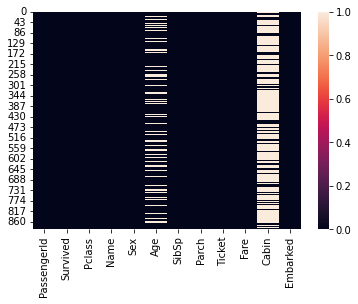

In [17]:
sns.heatmap(data=train.isnull())

<AxesSubplot:>

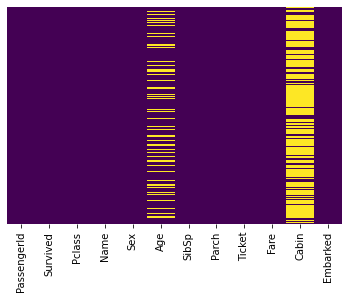

In [18]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

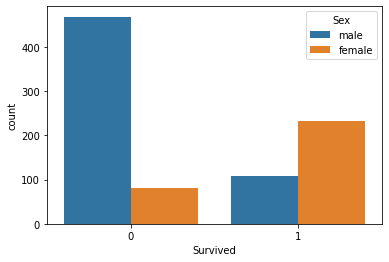

In [30]:
sns.countplot(x='Survived', hue='Sex', data=train)

In [31]:
train['Pclass'].unique()

array([3, 1, 2])

<AxesSubplot:xlabel='Survived', ylabel='count'>

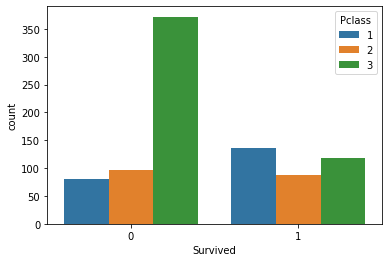

In [32]:
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

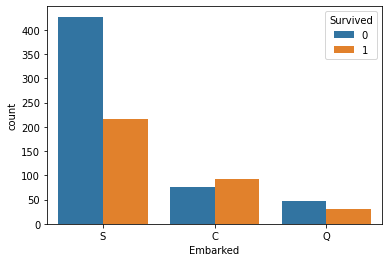

In [35]:
sns.countplot(x='Embarked', hue='Survived', data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

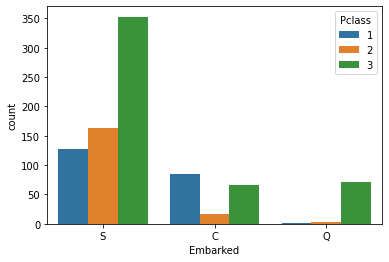

In [36]:
sns.countplot(x='Embarked', hue='Pclass', data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

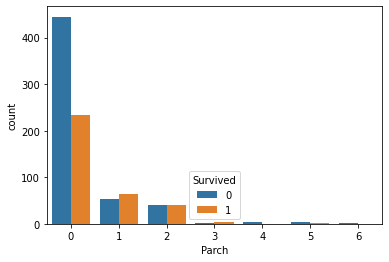

In [37]:
sns.countplot(x='Parch', hue='Survived', data=train)

## Part 2

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

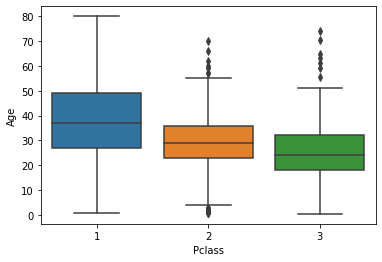

In [38]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [40]:
train[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [47]:
def impute_age(age_pclass):
    age = age_pclass[0]
    pclass = age_pclass[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [48]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

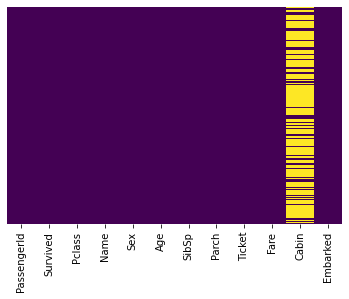

In [49]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [50]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

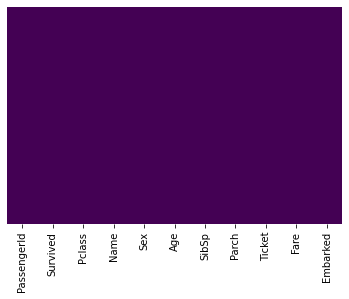

In [51]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

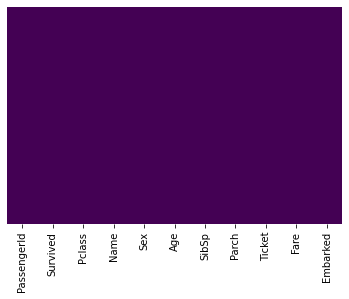

In [52]:
train.dropna(inplace=True)
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [55]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [56]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [59]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [60]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [61]:
train = pd.concat([train, sex, embark], axis=1)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [63]:
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [65]:
train.drop('PassengerId', axis=1, inplace=True)

In [66]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
